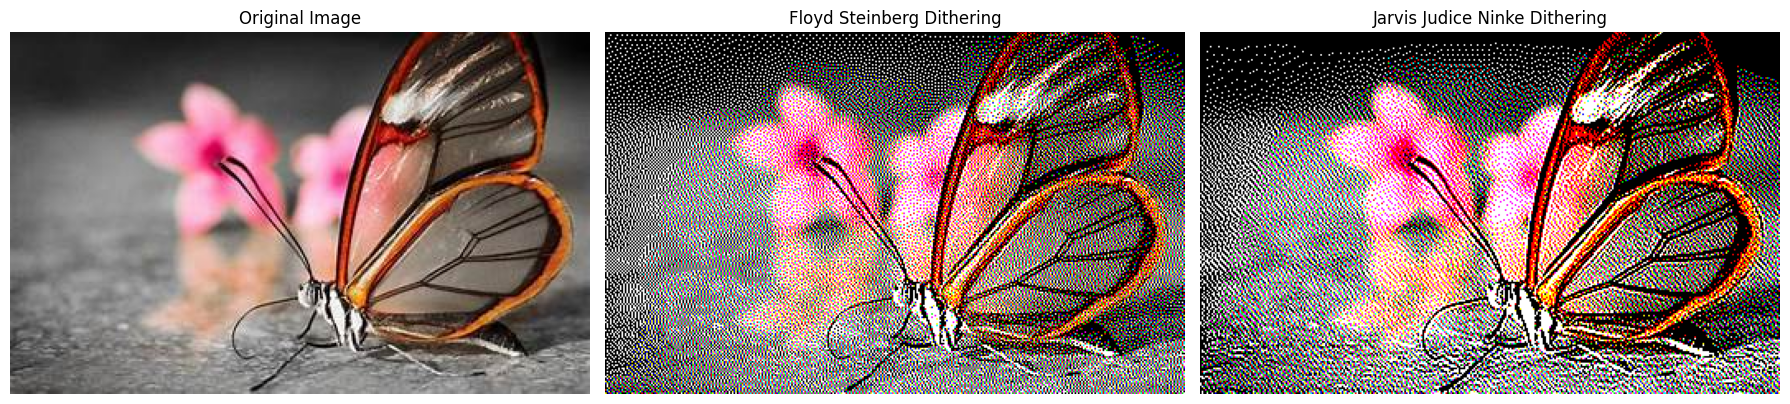

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def apply_floyd_steinberg_dither(input_image):
    if input_image.mode != 'RGB':
        input_image = input_image.convert('RGB')
    pixel_array = np.array(input_image, dtype=np.float32)
    img_height, img_width, num_channels = pixel_array.shape
    dithered_image = np.zeros_like(pixel_array, dtype=np.uint8)

    for row in range(img_height):
        for col in range(img_width):
            for channel in range(num_channels):
                original_val = pixel_array[row, col, channel]
                threshold_val = 255 * (original_val > 127)
                dithered_image[row, col, channel] = threshold_val
                error = original_val - threshold_val

                if col + 1 < img_width:
                    pixel_array[row, col + 1, channel] += error * 7 / 16
                if row + 1 < img_height:
                    if col > 0:
                        pixel_array[row + 1, col - 1, channel] += error * 3 / 16
                    pixel_array[row + 1, col, channel] += error * 5 / 16
                    if col + 1 < img_width:
                        pixel_array[row + 1, col + 1, channel] += error * 1 / 16

    return Image.fromarray(dithered_image)

def apply_jarvis_judice_ninke_dither(input_image):
    if input_image.mode != 'RGB':
        input_image = input_image.convert('RGB')
    pixel_matrix = np.array(input_image, dtype=np.float32)
    height, width, channels = pixel_matrix.shape
    dithered_output = np.zeros_like(pixel_matrix, dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            for c in range(channels):
                original_pixel = pixel_matrix[y, x, c]
                new_pixel = 255 * (original_pixel > 127)
                dithered_output[y, x, c] = new_pixel
                quant_error = original_pixel - new_pixel

                if x + 1 < width:
                    pixel_matrix[y, x + 1, c] += quant_error * 7 / 48
                if x + 2 < width:
                    pixel_matrix[y, x + 2, c] += quant_error * 5 / 48
                if y + 1 < height:
                    if x - 1 >= 0:
                        pixel_matrix[y + 1, x - 1, c] += quant_error * 3 / 48
                    pixel_matrix[y + 1, x, c] += quant_error * 5 / 48
                    if x + 1 < width:
                        pixel_matrix[y + 1, x + 1, c] += quant_error * 3 / 48
                    if x + 2 < width:
                        pixel_matrix[y + 1, x + 2, c] += quant_error * 1 / 48
                if y + 2 < height:
                    if x - 2 >= 0:
                        pixel_matrix[y + 2, x - 2, c] += quant_error * 1 / 48
                    if x - 1 >= 0:
                        pixel_matrix[y + 2, x - 1, c] += quant_error * 3 / 48
                    pixel_matrix[y + 2, x, c] += quant_error * 5 / 48
                    if x + 1 < width:
                        pixel_matrix[y + 2, x + 1, c] += quant_error * 3 / 48
                    if x + 2 < width:
                        pixel_matrix[y + 2, x + 2, c] += quant_error * 1 / 48

    dithered_output = np.clip(dithered_output, 0, 255)
    return Image.fromarray(dithered_output.astype(np.uint8))

image_filepath = '/content/image1.jpg'

# Load and prepare the original image
original_img = Image.open(image_filepath).convert('RGB')

# Apply Floyd Steinberg Dithering
floyd_result = apply_floyd_steinberg_dither(original_img)

# Apply Jarvis Judice Ninke Dithering
jarvis_result = apply_jarvis_judice_ninke_dither(original_img)

# Plotting the results
plt.figure(figsize=(18, 6))

# Display Original Image
plt.subplot(1, 3, 1)
plt.imshow(original_img)
plt.title('Original Image')
plt.axis('off')

# Display Floyd Steinberg Dithered Image
plt.subplot(1, 3, 2)
plt.imshow(floyd_result)
plt.title('Floyd Steinberg Dithering')
plt.axis('off')

# Display Jarvis Judice Ninke Dithered Image
plt.subplot(1, 3, 3)
plt.imshow(jarvis_result)
plt.title('Jarvis Judice Ninke Dithering')
plt.axis('off')

plt.tight_layout()
plt.show()


Floyd Steinberg Dithering:

Grainy Texture: Produces a noticeable, high-contrast texture due to the way it spreads pixel errors.
Detail Retention: Some fine details remain, but speckling can occur in areas with smooth color transitions.
Smoother Areas: Gradients like the background are a bit scattered but maintain some smoothness.

Jarvis Judice Ninke Dithering:

Smoother Texture: Results in a finer, smoother look with less graininess.
Softer Edges: Edges are less harsh, with a softer, more balanced distribution of pixels.
Better Gradients: Handles gradual color transitions better, making the image look more natural.


Comparison:
Floyd Steinberg is best for sharper, high contrast results but can be noisy in some areas.
Jarvis Judice Ninke creates smoother, cleaner results, especially in gradients.
Choose Floyd Steinberg for dramatic effects and Jarvis Judice Ninke for smoother, more refined images.